In [3]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud


In [4]:
!curl -O https://lazyprogrammer.me/course_files/spam.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
 29  491k   29  146k    0     0  57252      0  0:00:08  0:00:02  0:00:06 57298
100  491k  100  491k    0     0   165k      0  0:00:02  0:00:02 --:--:--  165k


In [7]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')



In [8]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df=df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.columns=['labels','data']

In [12]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: >

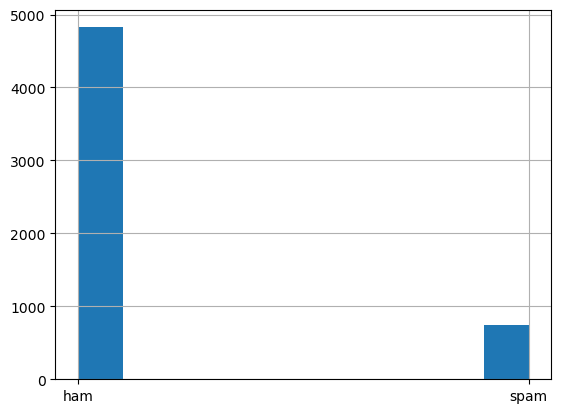

In [14]:
df['labels'].hist()

In [15]:
df['b_labels']=df['labels'].map({'ham':0,'spam':1})
Y=df['b_labels'].to_numpy()

In [16]:
df_train,df_test,Ytrain,Ytest=train_test_split(df['data'],Y,test_size=0.33)

In [17]:
featurizer=CountVectorizer(decode_error='ignore')
Xtrain=featurizer.fit_transform(df_train)
Xtest=featurizer.transform(df_test)


In [18]:
Xtrain

<3733x6982 sparse matrix of type '<class 'numpy.int64'>'
	with 49160 stored elements in Compressed Sparse Row format>

In [19]:
model =MultinomialNB()
model.fit(Xtrain,Ytrain)
print("train acc :" ,model.score(Xtrain,Ytrain))
print("test acc :" ,model.score(Xtest,Ytest))


train acc : 0.9927672113581569
test acc : 0.9847743338771071


In [20]:
Ptrain=model.predict(Xtrain)
Ptest=model.predict(Xtest)
print("train f1: ",f1_score(Ytrain,Ptrain))
print("test f1: ",f1_score(Ytest,Ptest))

train f1:  0.9719042663891778
test f1:  0.9450980392156864


In [21]:
Prob_train=model.predict_proba(Xtrain)[:,1]
Prob_test=model.predict_proba(Xtest)[:,1]
print("train AUC :",roc_auc_score(Ytrain,Prob_train))
print("test AUC :",roc_auc_score(Ytest,Prob_test))

train AUC : 0.9934806973050517
test AUC : 0.9801274170645471


In [23]:
cm=confusion_matrix(Ytrain,Ptrain)
cm

array([[3239,   14],
       [  13,  467]], dtype=int64)

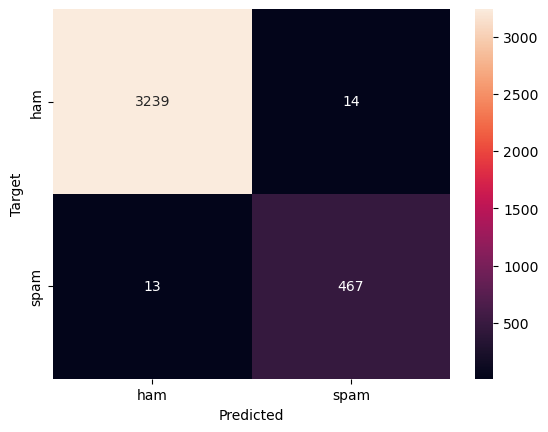

In [28]:
def plot_cm(cm):
    classes=['ham','spam']
    df_cm=pd.DataFrame(cm,index=classes,columns=classes)
    ax=sn.heatmap(df_cm,annot=True,fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")
plot_cm(cm)
    

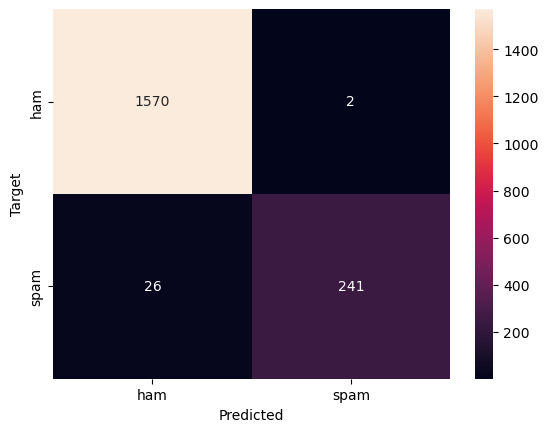

In [29]:
cm_test=confusion_matrix(Ytest,Ptest)
plot_cm(cm_test)

In [35]:
def visualize(label):
    words = ''  # Initialize the variable as 'words'
    for msg in df[df['labels'] == label]['data']:
        msg = msg.lower()
        words += msg + ' '  # Concatenate messages to 'words'

    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()



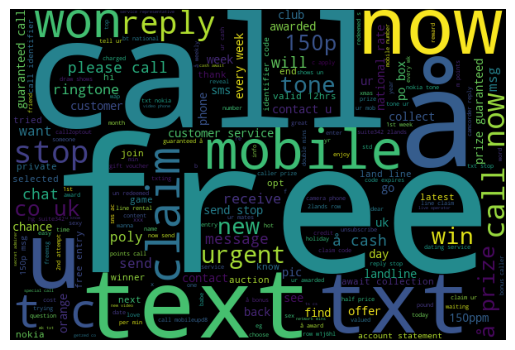

In [36]:
visualize('spam')

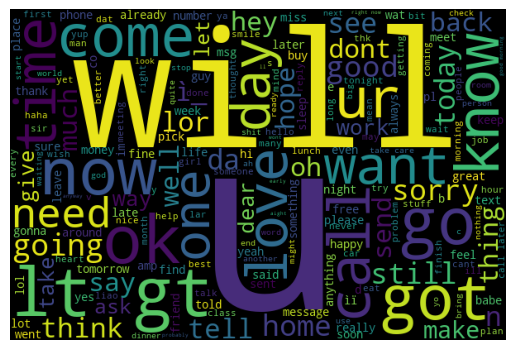

In [37]:
visualize('ham')

In [38]:
X=featurizer.transform(df['data'])
df['predictions']=model.predict(X)


In [39]:
sneaky_spam=df[(df['predictions']==0)&(df['b_labels']==1)]['data']
for msg in sneaky_spam:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
SMS. ac sun0819 posts HELLO:\You seem cool
Email AlertFrom: Jeri StewartSize: 2KBSubject: Low-cost prescripiton drvgsTo listen to email call 123
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Ever thought about living a good life with a perfect partner? Just txt back NAME and AGE to join the mobile community. (100p/SMS)
Talk sexy!! Make new friends or fall in love in the worlds most discreet text dating service. Just text VIP to 83110 and see who you could meet.
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Dont forget you can place as many FREE Requests with 1stchoice.co.uk as you wish. For more Information call 0870

In [41]:
not_actually_spam=df[(df['predictions']==1)&(df['b_labels']==0)]['data']
for msg in not_actually_spam:
    print(msg)

Finally the match heading towards draw as your prediction.
Waiting for your call.
26th OF JULY
Can u get pic msgs to your phone?
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Total video converter free download type this in google search:)
Madam,regret disturbance.might receive a reference check from DLF Premarica.kindly be informed.Rgds,Rakhesh,Kerala.
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderson
Gettin rdy to ship comp
Have you laid your airtel line to rest?
I liked the new mobile
I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;
Nokia phone is lovly..
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
